# <span style="color:darkblue"> QTM 530 Final Project 2 </span>

Linchuan Zhang

11/6/2024


**UPDATE 11/8/2024**

1: I cannot find a solution to clearly display the dollar sign within a Markdown chunk in the output HTML file, so I use "dollars" instead.

2: I cannot find a way to customize variable names in summary_col. I use stargazer instead, but it has other issues, such as the ordering of variables.

**Project Description**

I want to buy a new laptop. To gather information on the laptops available in the market, I search for laptops on Dell's official website and compile a list of Dell laptops for further analysis. The data source is Dell’s official website for laptop computers, with data collected on October 24, 2024. As of this date, there are 67 laptops available on the website, displayed across six pages. The information I extract includes the product name, model, current price, number of reviews, average star rating, and display screen size for each laptop. Since there are six pages in total, the data collection code will stop after reaching page six and will input the collected information into a structured dataset (Project 1).

In Project 2, I want to make my decision based on analyzing the following three factors: (1) the relationship between price and display size, (2) the relationship between the number of reviews and display size, and (3) the relationship between the rating and display size.

I find that:

First, smaller display laptops may be a little bit more higher priced.

Second, larger display laptops are significanly more popular (having more reviews).

Third, laptops across different display sizes have comparable customer satisfaction, reflected in their star ratings.

Therefore, I lean towards buying a laptop with a relatively larger display screen because laptops with larger displays are more popular and have similar prices and ratings compared to smaller displays. It might not be a bad idea to go with the majority's choice.

Part 2 (Report) of this assignment details my analyses and findings.


**Import packages and data**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from stargazer.stargazer import Stargazer #UPDATE: use stargazer to present regression tables
from bs4 import BeautifulSoup
result_df = pd.read_csv('Final_Project_1_Data_Linchuan_Zhang.csv')

**Part 1: Addressing any feedback from Project 1**

Feedback from Project 1: "I think that you can streamline the way that you produce using techniques from Lecture 3(b)"

Project 2: 

In [44]:
# ORIGINAL CODE IN PROJECT 1

# Mean and variance for numeric variables
price_mean = result_df['Price'].mean()
price_variance = result_df['Price'].var()
review_mean = result_df['Reviews Count'].mean()
review_variance = result_df['Reviews Count'].var()
rating_mean = result_df['1-5 Star Rating'].mean()
rating_variance = result_df['1-5 Star Rating'].var()
display_size_mean = result_df['Display Size'].mean()
display_size_variance = result_df['Display Size'].var()

summary_table_3 = pd.DataFrame({
    "Mean": [price_mean, review_mean, rating_mean, display_size_mean],
    "Variance": [price_variance, review_variance, rating_variance, display_size_variance]
}, index=["Price", "Reviews Count", "1-5 Star Rating", "Display Size"])

# With two decimal places
summary_table_3 = summary_table_3.astype(float).map(lambda x: f"{x:.2f}")
summary_table_3

,Mean,Variance
Price,1234.81,521909.12
Reviews Count,713.32,4346267.21
1-5 Star Rating,4.40,0.03
Display Size,14.50,2.28


In [ ]:
# UPDATED CODE IN PROJECT 2

# Use .agg function from Lecture 3b
summary_table_UPDATE = result_df[['Price', 'Reviews Count', '1-5 Star Rating', 'Display Size']].agg(['mean', 'var']).round(2)  # two decimal places
summary_table_UPDATE


,Price,Reviews Count,1-5 Star Rating,Display Size
mean,1234.81,713.32,4.40,14.50
var,521909.12,4346267.21,0.03,2.28


In [46]:
# To further produce the exact same table as in Project 1
summary_table_UPDATE_2 = summary_table_UPDATE.T #Transpose: variables as rows and statistics as columns
summary_table_UPDATE_2.columns = ['Mean', 'Variance']
summary_table_UPDATE_2

,Mean,Variance
Price,1234.81,521909.12
Reviews Count,713.32,4346267.21
1-5 Star Rating,4.40,0.03
Display Size,14.50,2.28


Feedback from Project 1: "As a minor comment, I recommend that you be more consistent in your use of present and past tense."

Project 2: I will use the present tense consistently throughout Project 2.

**Part 2: Report**

I am not sure which display size I should choose for the laptop. I have categorized display sizes into two groups: small and large. Small display size refers to less than and equal to 14 inches; large refers to greater than 14 inches.

I want to make my decision based on three factors: (1) the relationship between price and display size, (2) the relationship between the number of reviews and display size, and (3) the relationship between the rating and display size.

I also want to investigate the relationship between price and the number of reviews. Are laptops with lower prices more likely to receive a higher number of reviews? （regression practice)

In Part 2.1, I generate a categorical variable based on display size, check for missing values, and examine the data type of each variable in the updated dataset. In Part 2.2, I analyze the relationship between display size and price, number of reviews, and rating. I first use a summary table to present the descriptive statistics, then use figures to further illustrate each of these three factors. In Part 2.3, I run a regression with the number of reviews as the dependent variable and price as the independent variable. Finally, Part 2.4 summarizes my key findings.

**Part 2.1: Quality Check**

In [47]:
# Display rows with any missing values
rows_with_missing = result_df[result_df.isnull().any(axis=1)]
rows_with_missing

,Product Name,Model,Price,Reviews Count,1-5 Star Rating,Display Size,Page
50,XPS 13 Laptop,9350,1399.99,NaN,NaN,13.4,5
53,Latitude 5455 Laptop,5455,1019.00,NaN,NaN,14.0,5
56,Dell Pro Rugged 14 Laptop,RB14250,2119.00,NaN,NaN,14.0,5
59,Inspiron 14 Laptop,5441,749.99,NaN,NaN,14.0,5
61,Dell Pro Rugged 13 Laptop,RA13250,4169.00,NaN,NaN,13.3,6


As discussed in Project 1, there are five laptops missing information on their number of reviews and rating. When analyzing the relationships between display size and review count, as well as display size and rating, and when performing the regression analysis between price and review count, these five observations are excluded.

In [48]:
# Generate a categorical variable for display size
result_df['Display Size Category'] = result_df['Display Size'].apply(lambda x:'Small_<=14 in' if x <= 14 else 'Large_>14 in')

In [49]:
# Check the data types of each column
result_df.dtypes

Product Name              object
Model                     object
Price                    float64
Reviews Count            float64
1-5 Star Rating          float64
Display Size             float64
Page                       int64
Display Size Category     object
dtype: object

Check: Display Size Category is a categorical variable;

Other variables are also correct types.

**Part 2.2: Summary Statistics**

In [50]:
# Group by Display Size Category
summary_stats = result_df.groupby('Display Size Category').agg({
    'Price': ['mean', 'median', 'count'],
    'Reviews Count': ['mean', 'median', 'count'],
    '1-5 Star Rating':  ['mean', 'median', 'count']
}).round(2)
summary_stats

Price                Reviews Count               \
                          mean   median count          mean median count   
Display Size Category                                                      
Large_>14 in           1117.49   999.99    29       1317.07  411.0    29   
Small_<=14 in          1324.35  1124.49    38        182.76  102.0    33   

                      1-5 Star Rating               
                                 mean median count  
Display Size Category                               
Large_>14 in                     4.43    4.4    29  
Small_<=14 in                    4.37    4.4    33

As shown on the summary table above:

(1) Price: Laptops with smaller displays have a slightly higher mean and median price (1324.35 dollars and 1124.49 dollars, respectively) compared to those with larger displays (mean: 1117.49 dollars; median: 999.99 dollars). 

(2) Reviews Count: Laptops with larger displays have a significanly higher mean and median number of reviews (1317.07 dollars and 411 dollars, respectively) than those with smaller displays (mean: 182.76 dollars; median: 102 dollars). 

(3) Rating: The average ratings are similar between the two categories, with large displays at 4.43 (mean) and 4.4 (median) and small displays at 4.37 (mean) and 4.4 (median). 

In [ ]:
# MARKDOWN CODE UPDATED: use "dollars" instead of "$". I have tried other possible solutions such as \$, <span>$</span>, and &#36;, but none of them seem to work.

# Below is the original code

As shown on the summary table above:

(1) Price: Laptops with smaller displays have a slightly higher mean and median price (\$ 1324.35 and \$1124.49, respectively) compared to those with larger displays (\$1117.49 mean and \$999.99 median). 

(2) Reviews Count: Laptops with larger displays have a significanly higher mean and median number of reviews (\$1317.07 mean and \$411 median) than those with smaller displays (\$182.76 mean and \$102 median). 

(3) Rating: The average ratings are similar between the two categories, with large displays at 4.43 (mean) and 4.4 (median) and small displays at 4.37 (mean) and 4.4 (median). 

**Part 2.2.1: Display Size and Price**

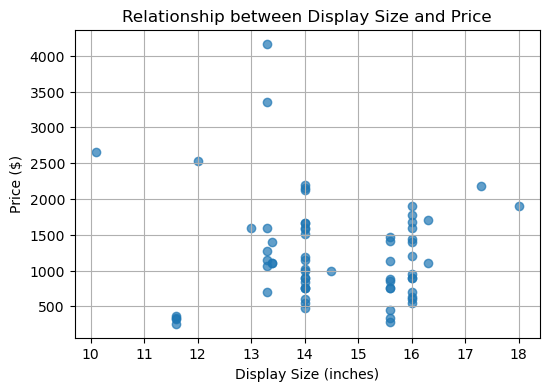

In [81]:
# Create a scatter plot to show the relationship between display size and price
plt.figure(figsize=(6, 4))
plt.scatter(result_df['Display Size'], result_df['Price'], alpha=0.7)
plt.xlabel('Display Size (inches)')
plt.ylabel('Price ($)')
plt.title('Relationship between Display Size and Price')
plt.grid(True)
plt.show()

The scatter plot illustrates the relationship between display size and price without grouping sizes into categories like "Small" and "Large." When each individual display size is plotted with price (instead of aggregating into two groups), there is no clear trend between display size and price.

**Part 2.2.2: Display Size and Number of Reviews**

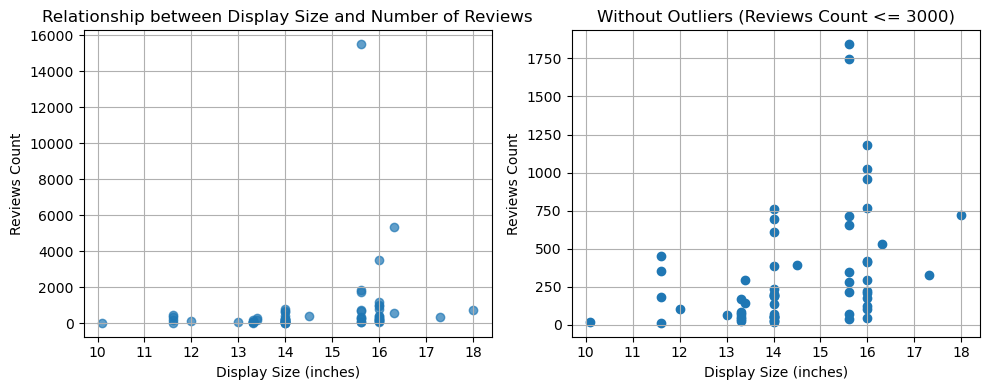

In [82]:
# Set up a 2x1 plot layout
plt.figure(figsize=(10, 4))

# Create a scatter plot to show the relationship between display size and number of reviews
plt.subplot(1, 2, 1)  # First plot in a 1x2 layout
plt.scatter(result_df['Display Size'], result_df['Reviews Count'], alpha=0.7)
plt.xlabel('Display Size (inches)')
plt.ylabel('Reviews Count')
plt.title('Relationship between Display Size and Number of Reviews')
plt.grid(True)

# Create a filtered DataFrame to exclude outliers
filtered_df = result_df[result_df["Reviews Count"] <= 3000]

# Plot 2: Scatter plot without outliers
plt.subplot(1, 2, 2)  # Second plot in a 1x2 layout
plt.scatter(filtered_df["Display Size"], filtered_df["Reviews Count"])
plt.title("Without Outliers (Reviews Count <= 3000)")
plt.xlabel("Display Size (inches)")
plt.ylabel("Reviews Count")
plt.grid(True)

plt.tight_layout()
plt.show()

The set of scatter plots above illustrates the relationship between display size and the number of reviews without grouping sizes into categories like "Small" and "Large." 

These plots is generally consistent with the summary statistics, which indicate that laptops with larger displays tend to have higher review counts on average. 

However, the large difference between the mean and median review counts, as well as the insights from the second plot (which excludes outliers), suggest that a few laptops with larger displays have exceptionally high review counts. These outliers can skew the perception of an overall trend, leading us overestimate the trend.

**Part 2.2.3: Display Size and Rating**

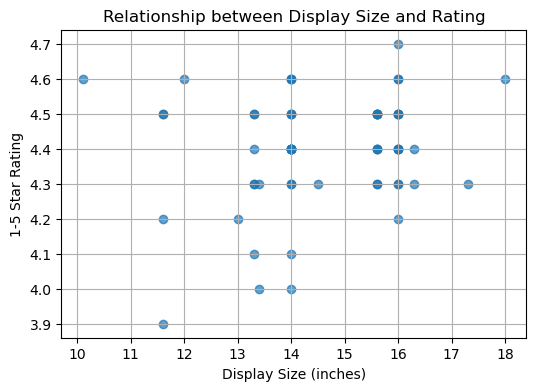

In [83]:
# Create a scatter plot to show the relationship between display size and rating
plt.figure(figsize=(6, 4))
plt.scatter(result_df['Display Size'], result_df['1-5 Star Rating'], alpha=0.7)
plt.xlabel('Display Size (inches)')
plt.ylabel('1-5 Star Rating')
plt.title('Relationship between Display Size and Rating')
plt.grid(True)
plt.show()

The scatter plot above illustrates the relationship between display size and rating (on a 1-5 scale) without grouping sizes into categories like "Small" and "Large." Consistent with the summary statistics, there is no clear pattern or correlation between display size and rating. Ratings are spread fairly evenly across all display sizes.

**Part 2.3: Price and Number of Reviews**

Are laptops with lower prices more likely to receive a higher number of reviews?

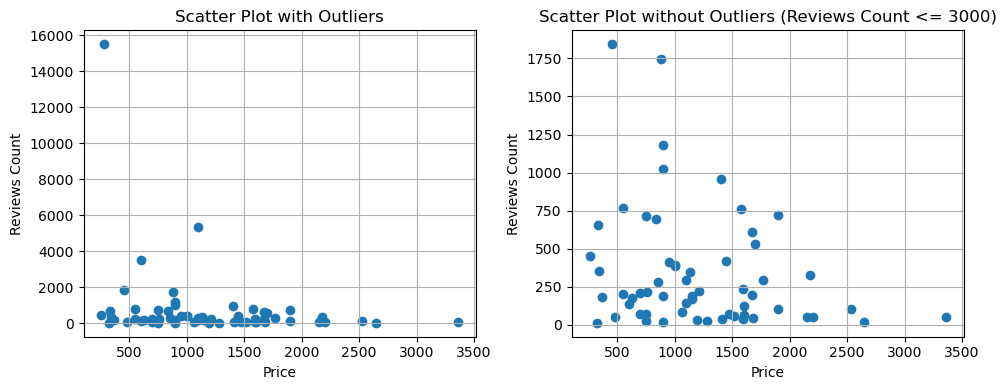

In [84]:
plt.figure(figsize=(10, 4))

# Plot 1: Scatter plot of all data points
plt.subplot(1, 2, 1)  # First plot in a 1x2 layout
plt.scatter(result_df["Price"], result_df["Reviews Count"])
plt.title("Scatter Plot with Outliers")
plt.xlabel("Price")
plt.ylabel("Reviews Count")
plt.grid(True)

# Plot 2: Scatter plot without outliers
plt.subplot(1, 2, 2)  # Second plot in a 1x2 layout
plt.scatter(filtered_df["Price"], filtered_df["Reviews Count"])
plt.title("Scatter Plot without Outliers (Reviews Count <= 3000)")
plt.xlabel("Price")
plt.ylabel("Reviews Count")
plt.grid(True)

plt.tight_layout()
plt.show()

The set of scatter plots above illustrates the relationship between price and the number of reviews for laptops, both with and without outliers. Laptops with lower prices tend to have higher review counts on average, but the pattern is not very obvious.

In [85]:
# UPDATED CODE
# Regression
model1 = smf.ols(formula='Q("Reviews Count") ~ Q("Price")', data=result_df).fit(cov_type="HC1")

# Multivariate regression with control (no need for C() around Display Size Category if it's already categorical)
model2 = smf.ols(formula='Q("Reviews Count") ~ Q("Price") + Q("Display Size Category")', data=result_df).fit(cov_type="HC1")

# Create Stargazer object with models
stargazer = Stargazer([model1, model2])
stargazer.custom_columns(["Model 1", "Model 2"])
stargazer.dependent_variable_name("Total Reviews")
stargazer.rename_covariates({
    'Q("Price")': 'Price',
    'Q("Display Size Category")[T.Small_<=14 in]': 'Small Display Size'
})

stargazer

UPDATE: Customize variable names when creating regression table

For summary_col: I cannot find a solution to customize variable names.

For Stargazer: I can customize variable names. However, the Python version of Stargazer is not as convenient as its R version. For example, the ordering of variables is not good (Price should be the first variable to be presented).

Note from GPT: In Stargazer for Python, the order of variables in the regression output is typically determined by statsmodels and the internal sorting of categorical variables, which can sometimes place categorical variables like Small Display Size before continuous variables like Price. There is no direct option in Stargazer to specify the order.

Conclusion: It seems that creating regression tables is generally more convenient and flexible in R and Stata than in Python.

In [86]:
#ORIGINAL CODE:
# Regression
model1 = smf.ols(formula='Q("Reviews Count") ~ Q("Price")', data=result_df).fit(cov_type="HC1")

# Multivariate regression with control
model2 = smf.ols(formula='Q("Reviews Count") ~ Q("Price") + C(Q("Display Size Category"))', data=result_df).fit(cov_type="HC1")

# Summary table with models
list_results = [model1, model2]
list_headings = ["Model 1", "Model 2"]
list_regressors = ["Q('Price')", "C(Q('Display Size'))"]
print(summary_col(list_results,
                  stars=True,
                  model_names=list_headings,
                  info_dict={'N': lambda x: f"{int(x.nobs)}"},  # Sample size
                  regressor_order=list_regressors))


                                                Model 1     Model 2   
----------------------------------------------------------------------
Intercept                                      1650.4750* 2114.2065** 
                                               (892.8719) (1066.7816) 
Q("Price")                                     -0.7929    -0.7133     
                                               (0.5510)   (0.5121)    
C(Q("Display Size Category"))[T.Small_<=14 in]            -1048.0443**
                                                          (483.1415)  
R-squared                                      0.0583     0.1216      
R-squared Adj.                                 0.0426     0.0919      
N                                              62         62          
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Model 1: the coefficient for price is -0.79 (not statistically significant), suggesting a very weak and non-significant negative relationship between price and review count.

Model 2: the effect of price on review count remains weak and non-significant after controlling the display size. However, laptops with smaller displays have statistically significant fewer reviews, which is consistant with the summary statistics discussed in Part 2.2.2. 

Summary: Regression analyses do no support the hypothesis that laptops with lower prices are more likely to receive a higher number of reviews.

**Discussion**

To sum up, I plan to buy a laptop with a larger display because these models are significantly more popular, receiving more reviews while generally having similar prices and ratings to laptops with smaller displays. The specific key findings are summarized in the Project Description section. 

These analyses are preliminary and simple, based on a limited number of observations (fewer than 70). 

Further analysis is needed to explore the technical specifications of each laptop in more detail and to increase the number of observations in the dataset.